##1. Data Cleaning
##2. EDA
##3. Text Preprocessing
##4. Model Building
##5. Evaluation
##6. Improvements
##7. Website Deployement

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

##Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#drop last 3 columns
cols = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
df.drop(columns=cols,inplace=True)

In [7]:
df.shape

(5572, 2)

In [8]:
df.sample(5)

,v1,v2
4400,ham,Many times we lose our best ones bcoz we are
4841,ham,"Awesome, that gonna be soon or later tonight?"
4251,ham,"Send ur birthdate with month and year, I will ..."
1498,ham,Time n Smile r the two crucial things in our l...
2383,ham,Your pussy is perfect!


In [9]:
df.rename(columns={"v1": "target","v2":"text"},inplace=True)
df.sample(5)

,target,text
3713,ham,"Oh, i will get paid. The most outstanding one ..."
4013,ham,"Sorry, I can't text &amp; drive coherently, se..."
1637,spam,"0A$NETWORKS allow companies to bill for SMS, s..."
2644,ham,My friends use to call the same.
618,ham,I come n pick Ì_ up... Come out immediately af...


In [10]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.sample(5)

,target,text
4801,0,Reverse is cheating. That is not mathematics.
484,0,You should change your fb to jaykwon thuglyfe ...
3844,0,Mmmm.... I cant wait to lick it!
3221,0,"Hi, my love! How goes that day? Fuck, this mor..."
3883,1,A link to your picture has been sent. You can ...


In [11]:
#check null
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
#duplicate values
df.duplicated().sum()

403

In [13]:
#remove duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 2)

#Exploratory Data Analysis (EDA)

In [15]:
#check for number of 'ham' and 'spam' columns
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

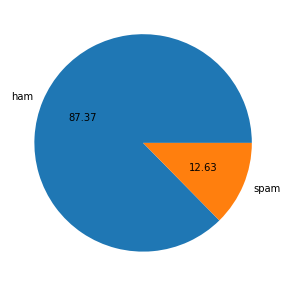

In [16]:
#plot graph
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()


In [17]:
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
df['num_characters'] = df['text'].apply(len) ##no of character
df['num_word'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) #no of words
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) #no of sentences
df.head()

,target,text,num_characters,num_word,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
df[['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [21]:
# ham messages
df[df['target'] == 0][['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [22]:
#spam
df[df['target'] == 1][['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [23]:
import seaborn as sns

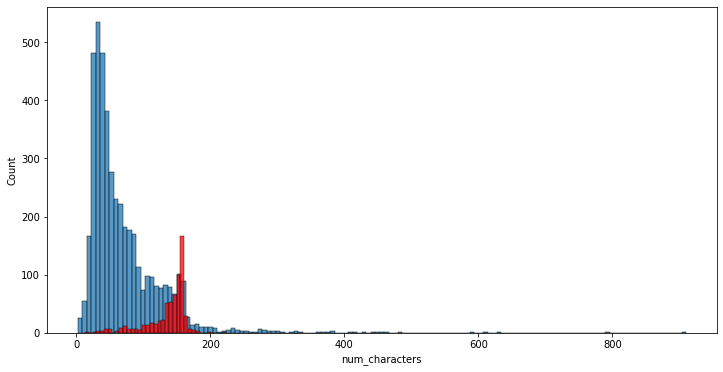

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')
plt.show()

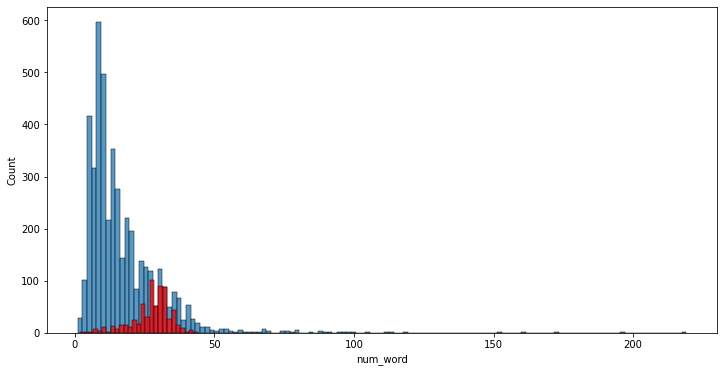

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_word'])
sns.histplot(df[df['target'] == 1]['num_word'],color='red')
plt.show()

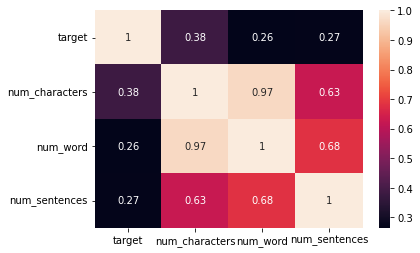

In [26]:
sns.heatmap(df.corr(),annot=True)

##Result of the above heat map


1. The depency of num_characters and the target 1 i.e.spam is the heighest being 0.32 as compared to num_word i.e 0.26 and num_sentences i.e. 0.27 so to predict target num_characters play impoortant part.

2. The dependency of num_characters to num_wors and num_sentences is also very high beigh 0.97 and 0.63 so we cannot keep all the 3 columns as they have majorly same impact so we will use only  num_characters column 



#Text Preprocessing



1.   Lower Case
2.   Tokenization
3.   Removing Special Characters
4.   Removing stop words and punctuation
5.   Stemming 



In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [29]:
ps = PorterStemmer()

In [30]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


In [31]:
transform_text('HI, How are YOU, are you going to $$$ party!!')

'hi go parti'

In [32]:
df['transformed_text'] = df['text'].apply(transform_text)

In [33]:
df.head()

,target,text,num_characters,num_word,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [34]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [35]:
#generating the most used words in spam message(spam word cloud)
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

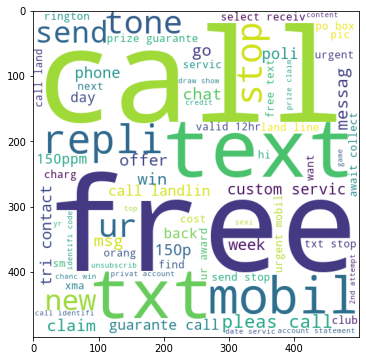

In [36]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

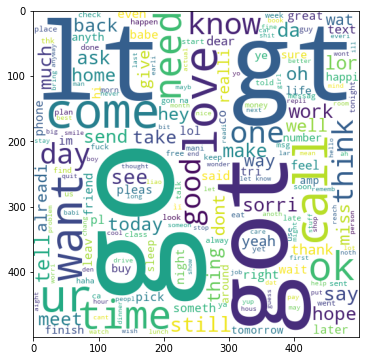

In [37]:
#generating the most used words in ham message(spam word cloud)
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [38]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
   words = msg.split()
   for word in words:
     spam_corpus.append(word)
print(spam_corpus[:10])
print(len(spam_corpus))

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt']
9883


In [39]:
from collections import Counter

In [40]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 189),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('prize', 82),
 ('4', 76),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 50),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


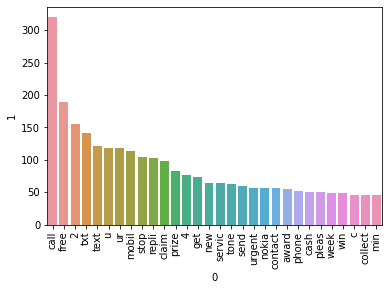

In [41]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [42]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
   words = msg.split()
   for word in words:
     ham_corpus.append(word)
print(ham_corpus[:10])
print(len(ham_corpus))

['go', 'jurong', 'point', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e']
34771


In [43]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 189),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('prize', 82),
 ('4', 76),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 50),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


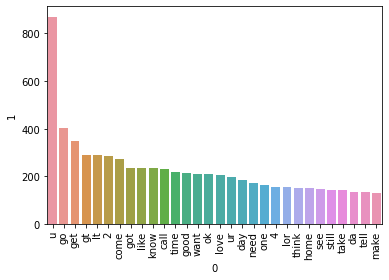

In [44]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

##Model Building

In [66]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv= CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [67]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape #(m messages, n words)

(5169, 3000)

In [68]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [71]:

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [72]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [74]:

gnb.fit(X_train,Y_train)
y_pred_1 = gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred_1))
print(confusion_matrix(Y_test,y_pred_1))
print(precision_score(Y_test,y_pred_1))

0.851063829787234
[[760 129]
 [ 25 120]]
0.4819277108433735


In [75]:
mnb.fit(X_train,Y_train)
y_pred_1 = mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred_1))
print(confusion_matrix(Y_test,y_pred_1))
print(precision_score(Y_test,y_pred_1))

0.971953578336557
[[888   1]
 [ 28 117]]
0.9915254237288136


In [76]:
bnb.fit(X_train,Y_train)
y_pred_1 = bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred_1))
print(confusion_matrix(Y_test,y_pred_1))
print(precision_score(Y_test,y_pred_1))

0.9738878143133463
[[886   3]
 [ 24 121]]
0.9758064516129032


As our data is imbalanced so precission score matters more and mnb gives us both high precission and high accuracy so we will go with mnb model and tfidf vectorizer

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [78]:

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [79]:

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [80]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [81]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.97678916827853, 0.9548872180451128)

In [82]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.9548872180451128
For  KN
Accuracy -  0.9090909090909091
Precision -  1.0
For  NB
Accuracy -  0.971953578336557
Precision -  0.9915254237288136
For  DT
Accuracy -  0.9342359767891683
Precision -  0.8347826086956521
For  LR
Accuracy -  0.9448742746615088
Precision -  0.860655737704918
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9917355371900827
For  AdaBoost
Accuracy -  0.9506769825918762
Precision -  0.8671875
For  BgC
Accuracy -  0.9613152804642167
Precision -  0.8776978417266187
For  ETC
Accuracy -  0.97678916827853
Precision -  0.984
For  GBDT
Accuracy -  0.9458413926499033
Precision -  0.9494949494949495
For  xgb
Accuracy -  0.9410058027079303
Precision -  0.9565217391304348


In [83]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [84]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.909091,1.000000
5,RF,0.974855,0.991736
2,NB,0.971954,0.991525
8,ETC,0.976789,0.984000
10,xgb,0.941006,0.956522
0,SVC,0.976789,0.954887
9,GBDT,0.945841,0.949495
7,BgC,0.961315,0.877698
6,AdaBoost,0.950677,0.867188
4,LR,0.944874,0.860656


In [85]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

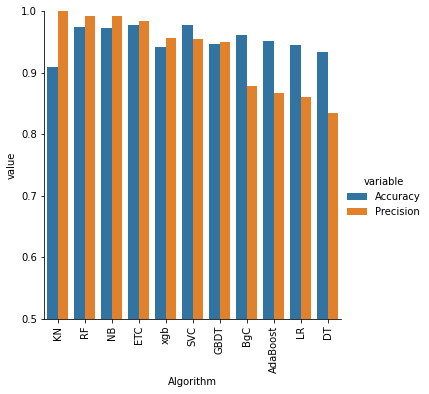

In [86]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [88]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(knc,open('model.pkl','wb'))

In [89]:
pickle.dump(mnb,open('model1.pkl','wb'))